In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [14]:
#loading the dataset

df = pd.read_csv("Telco-Customer-Churn.csv")

print("Dataset shape:", df.shape)
print(df['TotalCharges'])
print(df['tenure'])
df.head()

#from this dataset we can see that TotalCharges are not only numbers, maybe there are some blank spaces in it

Dataset shape: (7043, 21)
0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object
0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#cleaning some data

df = df.drop("customerID", axis=1)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

print(df['TotalCharges'])

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64


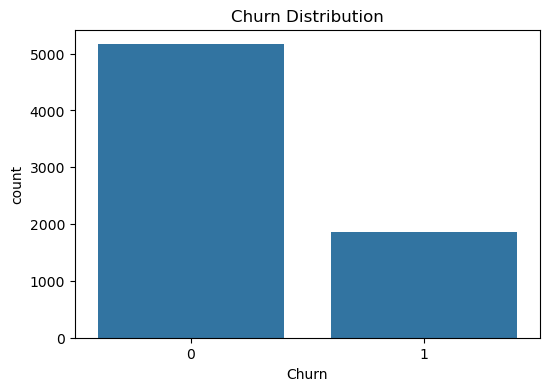

In [32]:
if not os.path.exists('images'):
    os.makedirs('images')

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.savefig('images/churn_distribution.png')
plt.show()

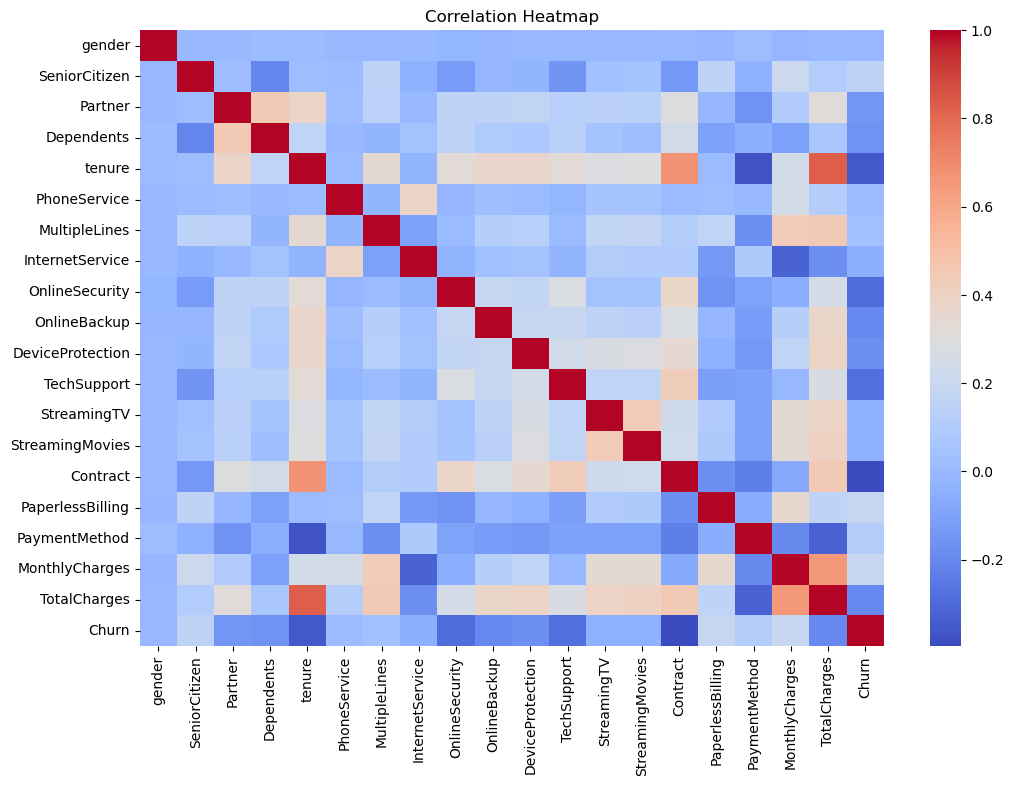

In [33]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig('images/correlation_heatmap.png')
plt.show()

In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model Training

# Logistic Regression
log_reg = LogisticRegression(
    C=2.0,              
    penalty='l2',           
    max_iter=2000,         
    class_weight='balanced',
    solver='lbfgs',         
)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, class_weight='balanced', n_jobs = -1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



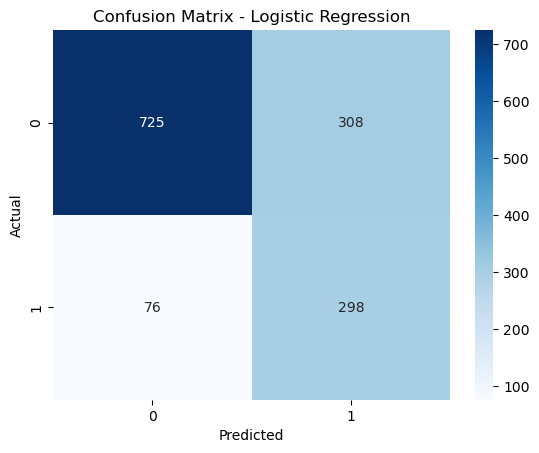


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



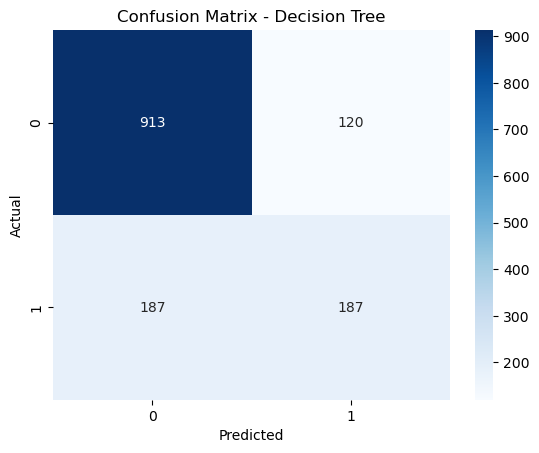


Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1033
           1       0.56      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407



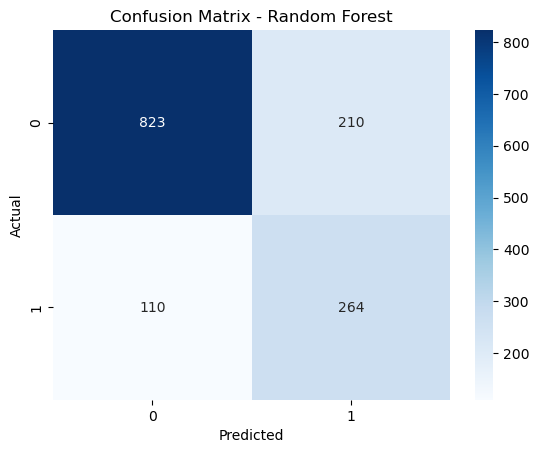

ROC-AUC Scores:
Logistic Regression: 0.8338195174223875
Decision Tree: 0.8185894880701555
Random Forest: 0.8324632061748399


In [34]:
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f'images/confusion_matrix_{model_name.lower().replace(" ", "_")}.png')
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ROC-AUC
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print("Decision Tree:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))
print("Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
plt.show()

**When the models take a small amount of time for training we see a 0.62 accuracy for the linear regression and random forest**
**But, let's try to increase the parameters for the training model**

When we try to increase the parameters of the random forest algorithm we see that we get some more true positives but we see that the number of true negatives goes down

At this point of coding, I see that we get the most true positives from the logistic regression, it is the best i could do now